In [ ]:
!pip -q install langchain chromadb transformers
!pip -q install accelerate bitsandbytes

In [ ]:
!pip install gigachat

In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip show langchain

Name: langchain
Version: 0.2.1
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import torch
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer, pipeline
from langchain.llms import HuggingFacePipeline

import os
import pandas as pd
import regex as re

from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain.chains import RetrievalQA
from langchain.document_loaders import UnstructuredURLLoader

from  langchain.schema import Document
import json
from typing import Iterable

from langchain.vectorstores import Chroma

from langchain import PromptTemplate

In [ ]:
!pip install sentence-transformers unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 24.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=1cf315098ea0530b9a9ae59e19207b4243b2cd93b84414c5e8a995a13434b97e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

In [ ]:
from huggingface_hub import login
login()

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
      return torch.device('cuda')
  else:
      return torch.device('cpu')

device = get_default_device()

In [ ]:
device.type

'cpu'

In [ ]:
from langchain.chat_models.gigachat import GigaChat

local_llm = GigaChat(credentials=AUTH, verify_ssl_certs=False)

In [ ]:
if device.type == 'cuda':
    model = model.cuda()

In [ ]:
def save_docs_to_jsonl(array:Iterable[Document], file_path:str)->None:
    with open(file_path, 'w') as jsonl_file:
        for doc in array:
            jsonl_file.write(doc.json() + '\n')

def load_docs_from_jsonl(file_path)->Iterable[Document]:
    array = []
    with open(file_path, 'r') as jsonl_file:
        for line in jsonl_file:
            data = json.loads(line)
            obj = Document(**data)
            array.append(obj)
    return array

In [ ]:
model_name = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"

hf = HuggingFaceEmbeddings(model_name=model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/14VMeRupdeCt9DWdmkWJZ-INT7UUr7oeA?usp=drive_link

In [ ]:
texts = load_docs_from_jsonl('docs/docs_chunks.jsonl')

In [ ]:
persist_directory = 'db'

embedding = hf

vectordb = Chroma.from_documents(documents=texts,
                                 embedding=embedding,
                                 collection_metadata={"hnsw:space": "cosine"},
                                 persist_directory=persist_directory)

In [ ]:
queries = []
with open('docs/questions.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    queries = list(map(lambda line: line.rstrip('\n').rstrip(' '), lines))

In [ ]:
queries

['Как пометить семантику модели как обнаруживаемую?',
 'Кому видны утвержденные семантические модели в PowerBI?',
 'Что делать, если ссылки в моей подписке на электронную почту больше не работают?',
 'Для чего используется Azure Cosmos DB?',
 'Как Azure Cosmos DB обеспечивает прогнозируемую производительность?',
 'Что такое контейнер Azure Cosmos DB?',
 'Что делать, если я не вижу параметр "Экспорт"?',
 'Какие  визуальные элементы Power BI не поддерживаются?',
 'Для чего предназначены динамические подписки на получателей?',
 'Что такое служебная шина Azure?',
 'Что такое пространство имен служебной шины?',
 'Что такое очередь служебной шины Azure?',
 'Что такое разделы и подписки служебной шины Azure?',
 'Что такое секционированная сущность?',
 'Где Служебная шина Azure хранит данные?']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

embeddings_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

def count_context_relevance(search_result, query_emb):
    contexts_emb = []
    context_relevance = []
    for context in search_result:
        context_emb = [embeddings_model.encode(context.page_content, convert_to_tensor=True).tolist()]
        contexts_emb.append(context_emb)
        context_relevance.append(cosine_similarity([query_emb], context_emb)[0][0])
    return sum(context_relevance)/len(context_relevance), contexts_emb

def count_answer_relevance(answer_emb, query_emb):
    return cosine_similarity([query_emb], [answer_emb])[0][0]

def count_groundedness(contexts_emb, answer_emb):
    groundedness = []
    for context_emb in contexts_emb:
        groundedness.append(cosine_similarity([answer_emb], context_emb)[0][0])
    return sum(groundedness)/len(groundedness)

In [ ]:
def evaluate_rag(df, test_num, retriever_desc, prompt, context_num, qa_chain):

    for query in queries:
        row = []
        row.append(test_num)
        row.append(retriever_desc)
        row.append(prompt)
        row.append(context_num)
        row.append(query)

        query_emb = embeddings_model.encode(query, convert_to_tensor=True).tolist()

        answer = qa_chain.invoke({"query": query})
        answer_text = answer['result']
        contexts = answer['source_documents']

        row.append(answer_text)

        answer_emb = embeddings_model.encode(answer_text, convert_to_tensor=True).tolist()

        context_relevance, contexts_emb = count_context_relevance(contexts, query_emb)

        row.append(count_answer_relevance(answer_emb, query_emb))
        row.append(count_groundedness(contexts_emb, answer_emb))
        row.append(context_relevance)

        df.loc[len(df.index)] = row

In [ ]:
def get_eval_result(df):
    test_num = df.loc[0, 'test_num']
    result = pd.DataFrame(columns=['test_num', 'retriever', 'prompt', 'context_num', 'answers_rel', 'groundedness', 'contexts_rel'])
    arr = list(df.loc[0, 'test_num':'context_num'])
    arr.append(df.loc[df['test_num'] == test_num, 'answers_rel'].mean())
    arr.append(df.loc[df['test_num'] == test_num, 'groundedness'].mean())
    arr.append(df.loc[df['test_num'] == test_num, 'contexts_rel'].mean())
    result.loc[len(result.index)] = arr
    return result

In [ ]:
COLUMNS_NAME = ['test_num', 'retriever', 'prompt', 'context_num', 'query', 'answer', 'answers_rel', 'groundedness', 'contexts_rel']

In [ ]:
df_eval1 = pd.DataFrame(columns=COLUMNS_NAME)

In [ ]:
# test 1
doc_num = 1
retriever = vectordb.as_retriever(search_kwargs={"k": doc_num})

qa_chain = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever,
    return_source_documents=True,
    chain_type="stuff"
)
evaluate_rag(df_eval1, 1, 'sbert', 'Default', doc_num, qa_chain)

In [ ]:
df_eval1.head()

,test_num,retriever,prompt,context_num,query,answer,answers_rel,groundedness,contexts_rel
0,1,sbert,Default,1,Как пометить семантику модели как обнаруживаемую?,Чтобы пометить семантику модели как обнаружива...,0.708627,0.878043,0.791668
1,1,sbert,Default,1,Кому видны утвержденные семантические модели в...,Утвержденные семантические модели в Power BI в...,0.697825,0.745839,0.760747
2,1,sbert,Default,1,"Что делать, если ссылки в моей подписке на эле...",Если ссылки в вашей подписке на электронную по...,0.790849,0.616585,0.593195
3,1,sbert,Default,1,Для чего используется Azure Cosmos DB?,Azure Cosmos DB может быть использован для веб...,0.755448,0.791388,0.843178
4,1,sbert,Default,1,Как Azure Cosmos DB обеспечивает прогнозируему...,Azure Cosmos DB обеспечивает прогнозируемую пр...,0.873343,0.916293,0.860322


In [ ]:
result1 = get_eval_result(df_eval1)
result1

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,1,sbert,Default,1,0.736119,0.730393,0.75374


In [ ]:
df_eval1.to_csv('eval1.csv', index=False)

In [ ]:
# test 2
df_eval2 = pd.DataFrame(columns=COLUMNS_NAME)
template = '''
Контекст: {context}

Используя контекст, ответь на вопрос: {question}
Ответ:
'''
prompt = PromptTemplate(
    template=template,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain2 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

evaluate_rag(df_eval2, 2, 'sbert', template, doc_num, qa_chain2)

In [ ]:
df_eval2.to_csv('eval2.csv', index=False)

In [ ]:
result2 = get_eval_result(df_eval2)
result2

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,2,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",1,0.7426,0.747931,0.75374


In [ ]:
# test 3
df_eval3 = pd.DataFrame(columns=COLUMNS_NAME)
doc_num2 = 2
retriever2 = vectordb.as_retriever(search_kwargs={"k": doc_num2})

qa_chain3 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever2,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

evaluate_rag(df_eval3, 3, 'sbert', template, doc_num2, qa_chain3)

In [ ]:
df_eval3.to_csv('eval3.csv', index=False)

In [ ]:
result3 = get_eval_result(df_eval3)
result3

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,3,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",2,0.753037,0.720222,0.713292


In [ ]:
# test 4
df_eval4 = pd.DataFrame(columns=COLUMNS_NAME)
doc_num3 = 3
retriever3 = vectordb.as_retriever(search_kwargs={"k": doc_num3})

qa_chain4 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

evaluate_rag(df_eval4, 4, 'sbert', template, doc_num3, qa_chain4)

In [ ]:
df_eval4.to_csv('eval4.csv', index=False)

In [ ]:
result4 = get_eval_result(df_eval4)
result4

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,4,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",3,0.75935,0.691587,0.688831


In [ ]:
# test 5
df_eval5 = pd.DataFrame(columns=COLUMNS_NAME)
template1 = '''
Ты лучший оператор технической поддержки компании Microsoft! Помоги пользователям получить хороший ответ на вопрос.
Если вопрос не по документации Microsoft, напиши, что ответ не по документации Microsoft. Если не знаешь ответ на вопрос, напиши, что не можешь ответить, не придумывай ответ.

Контекст: {context}

Используя контекст, ответь на вопрос: {question}
Ответ:
'''
prompt1 = PromptTemplate(
    template=template1,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain5 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt1}
)

evaluate_rag(df_eval5, 5, 'sbert', template1, 3, qa_chain5)

In [ ]:
df_eval5.to_csv('eval5.csv', index=False)

In [ ]:
result5 = get_eval_result(df_eval5)
result5

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,5,sbert,\nТы лучший оператор технической поддержки ком...,1,0.72245,0.769848,0.75374


In [ ]:
# test 6
df_eval6 = pd.DataFrame(columns=COLUMNS_NAME)
template2 = '''
Контекст: {context}

Используя контекст, ответь на вопрос: {question}. Этот вопрос очень важен для меня. Помоги, пожалуйста.
Ответ:
'''
prompt2 = PromptTemplate(
    template=template2,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain6 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt2}
)

evaluate_rag(df_eval6, 6, 'sbert', template2, 3, qa_chain6)

In [ ]:
df_eval6.to_csv('eval6.csv', index=False)

In [ ]:
result6 = get_eval_result(df_eval6)
result6

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,6,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",1,0.749961,0.761769,0.75374


In [ ]:
# test 7
df_eval7 = pd.DataFrame(columns=COLUMNS_NAME)

template3 = '''
Пример 1:
Контекст: Сертификация: сертификация означает, что содержимое соответствует стандартам качества организации и может рассматриваться как надежное, авторитетное содержимое, готовое для использования в организации.\nТолько группа рецензентов (определяемая администратором Power BI) имеет право на сертификацию содержимого. Владельцы содержимого, которые хотят убедиться, что их содержимое сертифицировано и не авторизованы для сертификации самостоятельно, должны следовать рекомендациям своей организации по получению сертификации содержимого.\nУзнайте, как сертифицировать содержимое или запросить сертификацию.\nСертификация доступна только в том случае, если администратор Power BI включил и настроил его для вашей организации.\nНа рисунке ниже показано, как одобренное содержимое (повышено и сертифицировано) четко определяется при поиске семантической модели для создания отчета.\nТипы контента, которые можно утвердить\nВ настоящее время Power BI поддерживает подтверждение для:\nСемантические модели\nПотоки данных

Используя контекст, ответь на вопрос: в каком случае доступна сертификация в Power BI?
Ответ:
Сертификация доступна только в том случае, если администратор Power BI включил и настроил его для вашей организации.


Контекст: {context}

Используя контекст, ответь на вопрос: {question}
Ответ:
'''
prompt3 = PromptTemplate(
    template=template3,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain7 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt3}
)

evaluate_rag(df_eval7, 7, 'sbert', template3, 3, qa_chain7)

In [ ]:
df_eval7.to_csv('eval7.csv', index=False)

In [ ]:
result7 = get_eval_result(df_eval7)
result7

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,7,sbert,\nПример 1:\nКонтекст: Сертификация: сертифика...,1,0.707356,0.751851,0.75374


In [ ]:
# test 8
df_eval8 = pd.DataFrame(columns=COLUMNS_NAME)

template4 = '''
Пример 1:
Контекст: Сертификация: сертификация означает, что содержимое соответствует стандартам качества организации и может рассматриваться как надежное, авторитетное содержимое, готовое для использования в организации.\nТолько группа рецензентов (определяемая администратором Power BI) имеет право на сертификацию содержимого. Владельцы содержимого, которые хотят убедиться, что их содержимое сертифицировано и не авторизованы для сертификации самостоятельно, должны следовать рекомендациям своей организации по получению сертификации содержимого.\nУзнайте, как сертифицировать содержимое или запросить сертификацию.\nСертификация доступна только в том случае, если администратор Power BI включил и настроил его для вашей организации.\nНа рисунке ниже показано, как одобренное содержимое (повышено и сертифицировано) четко определяется при поиске семантической модели для создания отчета.\nТипы контента, которые можно утвердить\nВ настоящее время Power BI поддерживает подтверждение для:\nСемантические модели\nПотоки данных

Используя контекст, ответь на вопрос: Что позволяется делать тип ссылки конт?
Ответ:
Сертификация доступна только в том случае, если администратор Power BI включил и настроил его для вашей организации.


Пример 2:
Контекст: Конкретные люди\nЭтот тип ссылки позволяет определенным пользователям или группам получать доступ к отчету. Если этот параметр выбран, введите имена или адреса электронной почты пользователей, с которыми вы хотите поделиться. Этот тип ссылки позволяет предоставить общий доступ гостевым пользователям в идентификаторе Microsoft Entra в вашей организации. Вы не можете предоставлять общий доступ внешним пользователям, которые не являются гостями в вашей организации.\nПараметры\nСсылки, предоставляющие доступ к Люди в организации или конкретные пользователи, всегда будут включать по крайней мере доступ на чтение. Однако можно также указать, нужно ли включить или исключить следующие разрешения.\nПовторное предоставление общего доступа (включено по умолчанию) — позволяет получателям предоставлять общий доступ к отчету другим пользователям.

Используя контекст, ответь на вопрос: Что позволяется делать тип ссылки конкретные люди?
Ответ:
Этот тип ссылки позволяет определенным пользователям или группам получать доступ к отчету. Если этот параметр выбран, введите имена или адреса электронной почты пользователей, с которыми вы хотите поделиться. Этот тип ссылки позволяет предоставить общий доступ гостевым пользователям в идентификаторе Microsoft Entra в вашей организации. Вы не можете предоставлять общий доступ внешним пользователям, которые не являются гостями в вашей организации.


Контекст: {context}

Используя контекст, ответь на вопрос: {question}
Ответ:
'''
prompt4 = PromptTemplate(
    template=template4,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain8 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt4}
)

evaluate_rag(df_eval8, 8, 'sbert', template4, 3, qa_chain8)

In [ ]:
df_eval8.to_csv('eval8.csv', index=False)

In [ ]:
result8 = get_eval_result(df_eval8)
result8

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,8,sbert,\nПример 1:\nКонтекст: Сертификация: сертифика...,1,0.62695,0.734005,0.75374


In [ ]:
# test 5
df_eval9 = pd.DataFrame(columns=COLUMNS_NAME)
template5 = '''
Ты лучший оператор технической поддержки компании Microsoft! Помоги пользователям получить хороший ответ на вопрос.
Если вопрос не по документации Microsoft, напиши, что ответ не по документации Microsoft. Если не знаешь ответ на вопрос, напиши, что не можешь ответить, не придумывай ответ.

Контекст: {context}

Используя контекст, ответь на вопрос: {question}
Ответ:
'''
prompt5 = PromptTemplate(
    template=template5,
    input_variables=[
        'context',
        'question',
    ]
)
qa_chain9 = RetrievalQA.from_chain_type(
    local_llm,
    retriever=retriever3,
    return_source_documents=True,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt5}
)

evaluate_rag(df_eval9, 9, 'sbert', template5, 3, qa_chain9)

In [ ]:
df_eval9.to_csv('eval9.csv', index=False)

In [ ]:
result9 = get_eval_result(df_eval9)
result9

In [ ]:
df_evals = pd.concat([df_eval1,df_eval2,df_eval3,df_eval4,df_eval5,df_eval6,df_eval7,df_eval8,df_eval9])
df_evals.head()

,test_num,retriever,prompt,context_num,query,answer,answers_rel,groundedness,contexts_rel
0,1,sbert,Default,1,Как пометить семантику модели как обнаруживаемую?,Чтобы пометить семантику модели как обнаружива...,0.708627,0.878043,0.791668
1,1,sbert,Default,1,Кому видны утвержденные семантические модели в...,Утвержденные семантические модели в Power BI в...,0.697825,0.745839,0.760747
2,1,sbert,Default,1,"Что делать, если ссылки в моей подписке на эле...",Если ссылки в вашей подписке на электронную по...,0.790849,0.616585,0.593195
3,1,sbert,Default,1,Для чего используется Azure Cosmos DB?,Azure Cosmos DB может быть использован для веб...,0.755448,0.791388,0.843178
4,1,sbert,Default,1,Как Azure Cosmos DB обеспечивает прогнозируему...,Azure Cosmos DB обеспечивает прогнозируемую пр...,0.873343,0.916293,0.860322


In [ ]:
df_evals.to_csv('evals.csv', index=False)

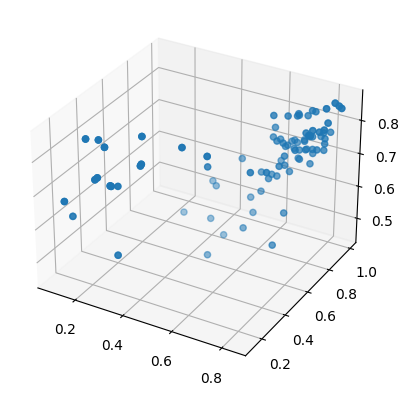

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_evals['answers_rel'], df_evals['groundedness'], df_evals['contexts_rel'])

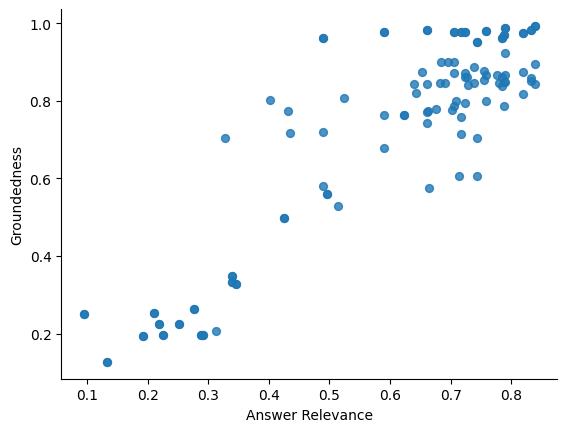

In [ ]:
df_evals.plot(kind='scatter', x='answers_rel', y='groundedness', s=32, alpha=.8)
plt.xlabel("Answer Relevance")
plt.ylabel("Groundedness")
plt.gca().spines[['top', 'right',]].set_visible(False)

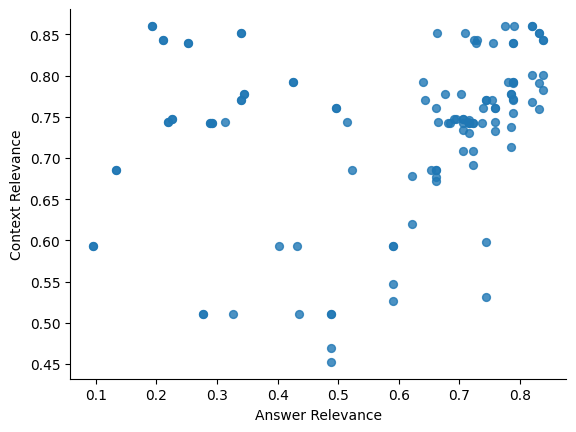

In [ ]:
df_evals.plot(kind='scatter', x='answers_rel', y='contexts_rel', s=32, alpha=.8)
plt.xlabel("Answer Relevance")
plt.ylabel("Context Relevance")
plt.gca().spines[['top', 'right',]].set_visible(False)

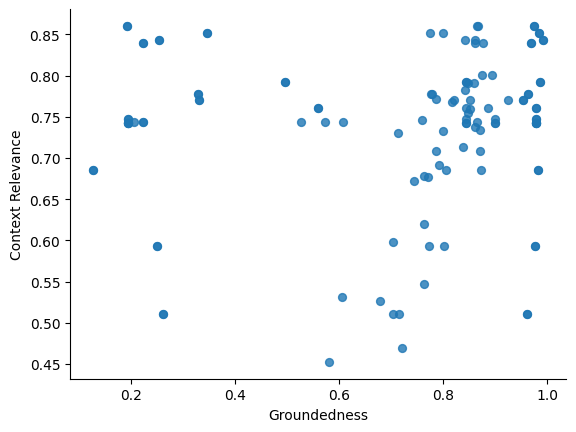

In [ ]:
df_evals.plot(kind='scatter', x='groundedness', y='contexts_rel', s=32, alpha=.8)
plt.xlabel("Groundedness")
plt.ylabel("Context Relevance")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_results = pd.concat([result1,result2,result3,result4,result5,result6,result7,result8,result9])

In [ ]:
df_results

,test_num,retriever,prompt,context_num,answers_rel,groundedness,contexts_rel
0,1,sbert,Default,1,0.736119,0.730393,0.753740
0,2,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",1,0.742600,0.747931,0.753740
0,3,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",2,0.753037,0.720222,0.713292
0,4,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",3,0.759350,0.691587,0.688831
0,5,sbert,\nТы лучший оператор технической поддержки ком...,1,0.722450,0.769848,0.753740
0,6,sbert,"\nКонтекст: {context}\n\nИспользуя контекст, о...",1,0.749961,0.761769,0.753740
0,7,sbert,\nПример 1:\nКонтекст: Сертификация: сертифика...,1,0.707356,0.751851,0.753740
0,8,sbert,\nПример 1:\nКонтекст: Сертификация: сертифика...,1,0.626950,0.734005,0.753740


In [ ]:
df_results.to_csv('evals_res.csv', index=False)

------------------------------------